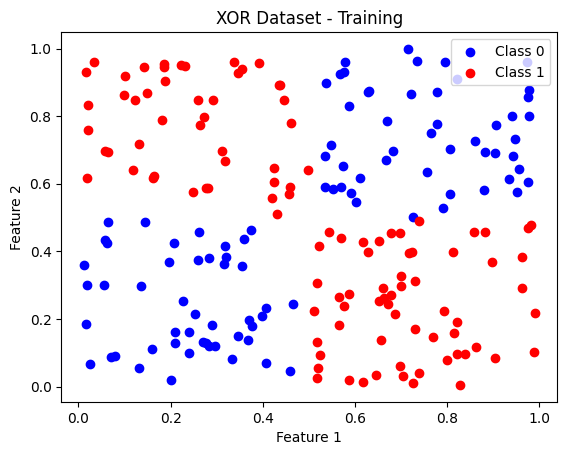

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score
# Generate XOR dataset
np.random.seed(0)

X_train = np.random.rand(200, 2)
y_train = np.logical_xor(X_train[:, 0]>0.5, X_train[:, 1]>0.5).astype(int)

X_test = np.random.rand(200, 2)
y_test = np.logical_xor(X_test[:, 0] > 0.5, X_test[:, 1] > 0.5).astype(int)

class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]

# Plot the points
plt.scatter(class_0[:, 0], class_0[:, 1], c='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], c='red', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('XOR Dataset - Training')
plt.legend()

plt.show()

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [119]:
def plot_decision_boundary(model, X, y):
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    X_grid_tensor = torch.tensor(X_grid, dtype=torch.float32)

    # Make predictions on the grid using the model
    with torch.no_grad():
        outputs = model(X_grid_tensor)
        predictions = torch.round(outputs)

    Z = predictions.numpy().reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z,cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

<h1>MLP Without Regularization</h1>

Epoch 0, Loss: 0.7807630896568298
Epoch 100, Loss: 0.6227806210517883
Epoch 200, Loss: 0.4804821014404297
Epoch 300, Loss: 0.32566210627555847
Epoch 400, Loss: 0.211351677775383
Epoch 500, Loss: 0.1444750428199768
Epoch 600, Loss: 0.10837803035974503
Epoch 700, Loss: 0.08631902933120728
Epoch 800, Loss: 0.07130269706249237
Epoch 900, Loss: 0.060376740992069244
Accuracy: 0.97


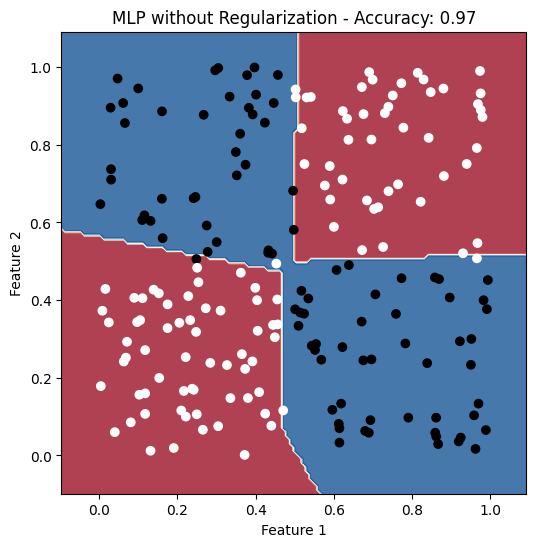

In [120]:
torch.manual_seed(42)

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

mlp_model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.01)

for epoch in range(1000):
    optimizer.zero_grad()
    outputs = mlp_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')



with torch.no_grad():
    mlp_model.eval()
    outputs = mlp_model(X_test_tensor)
    predictions = torch.round(outputs)
    mlp_accuracy = accuracy_score(y_test, predictions.numpy())
    print(f'Accuracy: {mlp_accuracy:.2f}')
plt.figure(figsize=(6, 6))
plot_decision_boundary(mlp_model, X_test, y_test)
plt.title(f'MLP without Regularization - Accuracy: {mlp_accuracy:.2f}')
plt.show()


<h1>MLP with L2 Regularization
</h1>

Epoch 0, Loss: 0.7807630896568298
Epoch 100, Loss: 0.6257728338241577
Epoch 200, Loss: 0.4925954341888428
Epoch 300, Loss: 0.35073548555374146
Epoch 400, Loss: 0.23655685782432556
Epoch 500, Loss: 0.1713721603155136
Epoch 600, Loss: 0.1399238556623459
Epoch 700, Loss: 0.12304206937551498
Epoch 800, Loss: 0.11306896805763245
Epoch 900, Loss: 0.1066707894206047
Accuracy with L2 regularization: 0.96


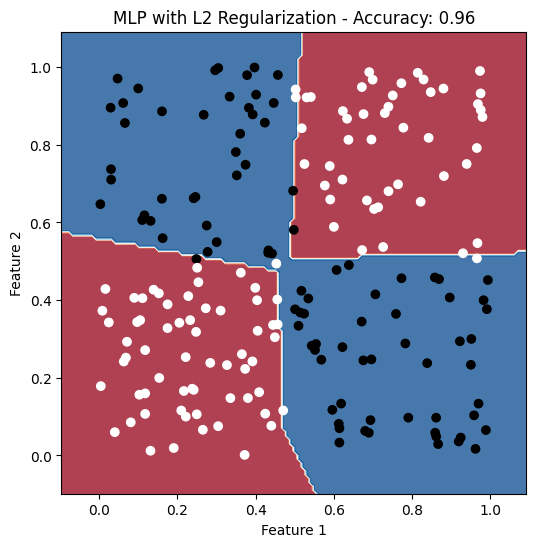

In [121]:
torch.manual_seed(42)
mlp_l2_model = MLP()
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_l2_model.parameters(), lr=0.01, weight_decay = 0.001)  

# Adding L2 regularization(weight_decay is the hyperparameter for L2 regularization)

for epoch in range(1000):
    optimizer.zero_grad()
    outputs = mlp_l2_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

with torch.no_grad():
    mlp_l2_model.eval()
    outputs = mlp_l2_model(X_test_tensor)
    predictions = torch.round(outputs)
    mlp_l2_accuracy = accuracy_score(y_test, predictions.numpy())
    print(f'Accuracy with L2 regularization: {mlp_l2_accuracy:.2f}')

plt.figure(figsize=(6, 6))
plot_decision_boundary(mlp_l2_model, X_test, y_test)
plt.title(f'MLP with L2 Regularization - Accuracy: {mlp_l2_accuracy:.2f}')
plt.show()


<h1>MLP With L1 Regularization</h1>

Epoch 0, Loss: 0.7867862582206726
Epoch 100, Loss: 0.1483263075351715
Epoch 200, Loss: 0.11102321743965149
Epoch 300, Loss: 0.10449697822332382
Epoch 400, Loss: 0.10304734110832214
Epoch 500, Loss: 0.10239017009735107
Epoch 600, Loss: 0.102027028799057
Epoch 700, Loss: 0.10178238153457642
Epoch 800, Loss: 0.10164651274681091
Epoch 900, Loss: 0.10152167081832886


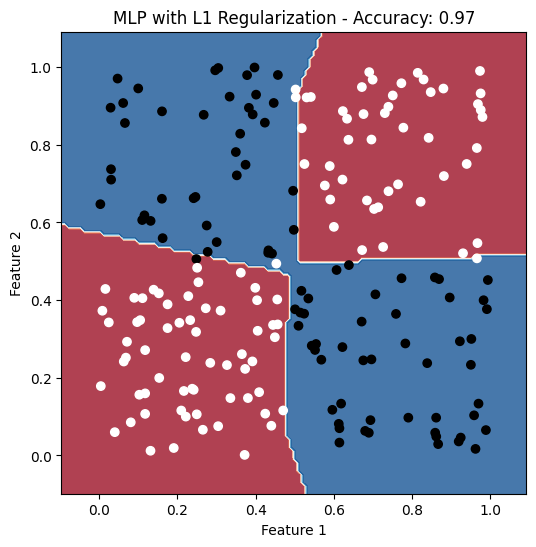

Accuracy with L1 regularization: 0.97


In [122]:
torch.manual_seed(42)

class MLPWithL1(nn.Module):
    def __init__(self, lambda_l1=0.001):
        super(MLPWithL1, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.lambda_l1 = lambda_l1

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

mlp_model_with_l1 = MLPWithL1()
criterion = nn.BCELoss()

# Adjust the learning rate and lambda_l1 value
learning_rate = 0.1
lambda_l1 = 0.001

optimizer = optim.Adam(mlp_model_with_l1.parameters(), lr=learning_rate)

# Training the MLP Model with L1 regularization
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = mlp_model_with_l1(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))
    
    # Compute L1 regularization term
    l1_regularization = 0
    for param in mlp_model_with_l1.parameters():
        l1_regularization += torch.norm(param, p=1)  # Calculate L1 norm for each parameter
    
    # Add L1 regularization to the loss
    loss += lambda_l1 * l1_regularization
    
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Evaluation on test set
with torch.no_grad():
    mlp_model_with_l1.eval()
    outputs = mlp_model_with_l1(X_test_tensor)
    predictions = torch.round(outputs)
    mlp_accuracy_with_l1 = accuracy_score(y_test, predictions.numpy())

# Plot decision boundary for MLP model with L1 regularization
plt.figure(figsize=(6, 6))
plot_decision_boundary(mlp_model_with_l1, X_test, y_test)
plt.title(f'MLP with L1 Regularization - Accuracy: {mlp_accuracy_with_l1:.2f}')
plt.show()

print(f'Accuracy with L1 regularization: {mlp_accuracy_with_l1:.2f}')


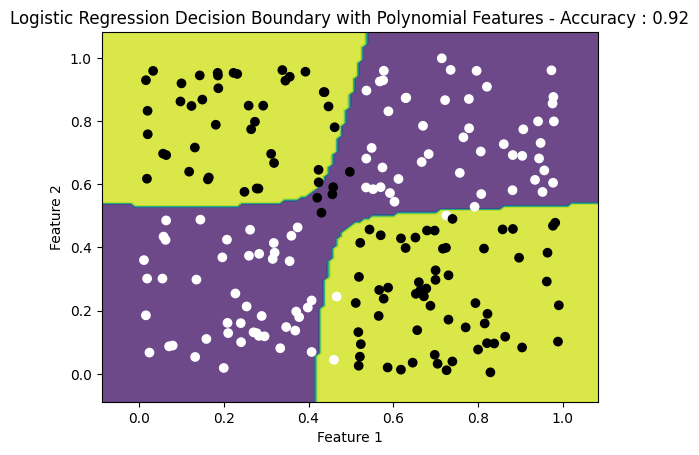

In [123]:
# Polynomial Feature
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Logistic Regression 
LR_model = LogisticRegression()
LR_model.fit(X_train_poly, y_train)

y_pred = LR_model.predict(X_test_poly)

LR_accuracy = accuracy_score(y_test, y_pred)


def plot_decision_boundary_LR(X, y, model, poly, title):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z , alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(xx.min(), xx.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot decision boundary
plot_decision_boundary_LR(X_train, y_train, LR_model, poly, f"Logistic Regression Decision Boundary with Polynomial Features - Accuracy : {LR_accuracy}")



**MLP without Regularization:**

- Compared to models with regularization, the decision boundary might exhibit more flexibility and non-linearity.
- Without regularization, the model's weights are not encouraged to be sparse, so all weights contribute to the decision boundary, potentially resulting in a more complex model.


**MLP with L1 Regularization:**

- Due to the regularization, the decision boundary tends to be more linear compared to the decision boundaries of models without regularization.
- L1 regularization encourages sparsity in the model's weights, resulting in some weights being pushed to exactly zero. This can lead to a simpler model with fewer parameters, which is reflected in the decision boundary.


**MLP with L2 Regularization:**

- L2 regularization penalizes large weights, resulting in smoother decision boundaries and potentially reducing overfitting.
- Unlike L1 regularization, L2 regularization does not encourage sparsity in the weights, so all weights tend to be small rather than exactly zero.


**Logistic Regression with Polynomial Features:**

- The decision boundary of logistic regression with polynomial features tends to be more complex and non-linear compared to the decision boundaries of MLP models.
- The decision boundary follows the contours of the data more closely, capturing the non-linear relationships between features.
- Polynomial features allow logistic regression to capture higher-order interactions between features, resulting in a more flexible decision boundary.
